# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
from lib2to3.pgen2.tokenize import group

import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [3]:
df = pd.read_csv("lab12_files/US_Baby_Names_right.csv")
display(df.head())

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów


In [4]:
baby_names = df
print(baby_names.dtypes)
print("all records: ", len(baby_names))

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
all records:  1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [6]:
display(baby_names.head(10))

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [11]:
baby_names2 = baby_names.drop(labels = ['Unnamed: 0', 'Id'], axis = 1)
display(baby_names2.head())

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [52]:
print("imion kobiet jest: ", len(baby_names2[baby_names2['Gender'] == 'F']))
print("imion mezczyzn jest: ", len(baby_names2[baby_names2['Gender'] == 'M']))


imion kobiet jest:  558846
imion mezczyzn jest:  457549


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [12]:
grouped_by_name_all = baby_names.groupby('Name')['Count'].sum().sort_values(ascending = False)
top10_all = grouped_by_name_all.head(10)
print(top10_all)
grouped_by_name_F = baby_names2[baby_names2['Gender'] == 'F'].groupby('Name')['Count'].sum().sort_values(ascending = False)
grouped_by_name_M = baby_names2[baby_names2['Gender'] == 'M'].groupby('Name')['Count'].sum().sort_values(ascending = False)
top10f = grouped_by_name_F.head(10)
top10m = grouped_by_name_M.head(10)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

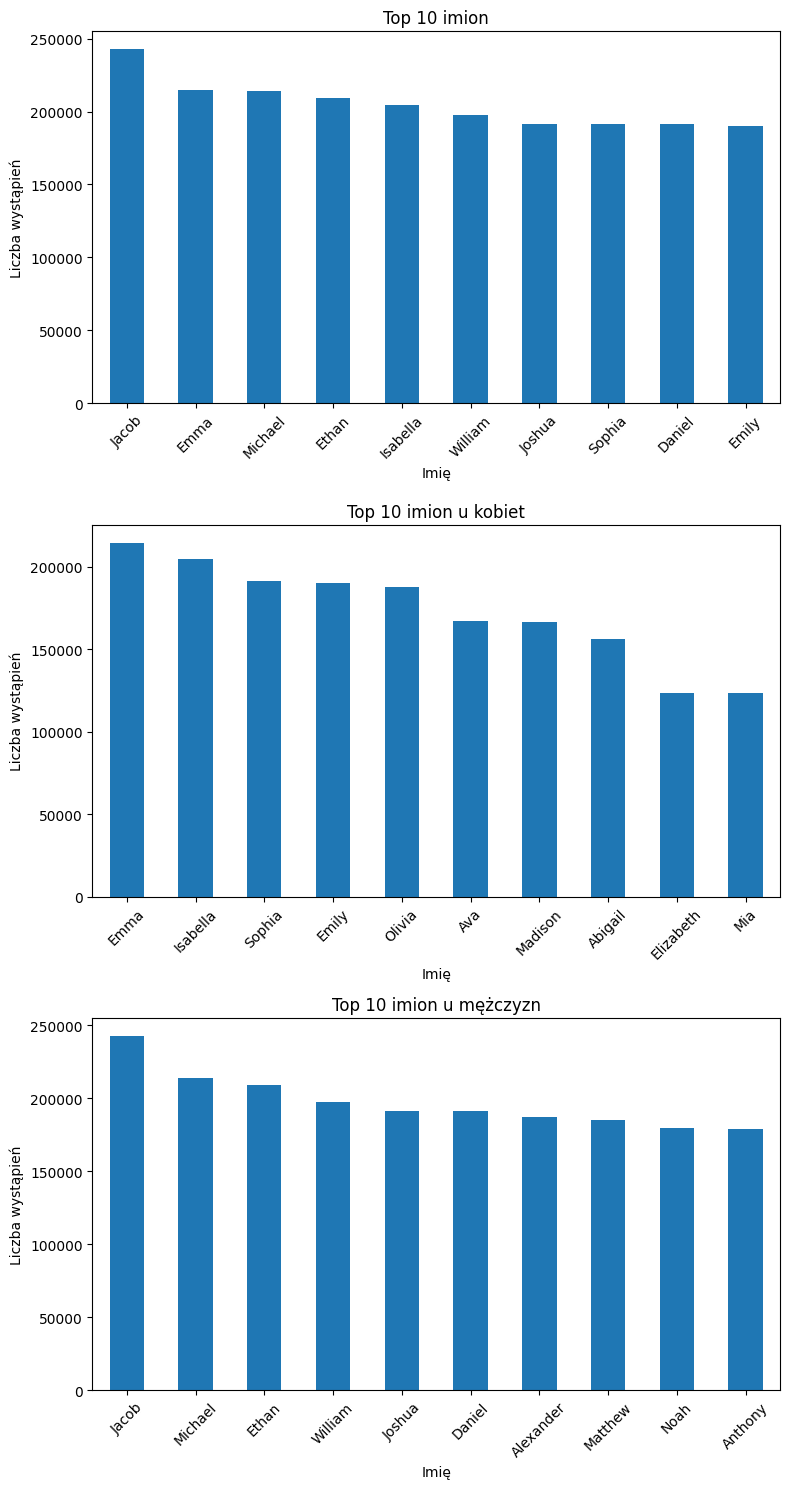

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8,15))

top10_all.plot(kind = "bar", ax = axes[0])
axes[0].set_title("Top 10 imion")
axes[0].set_xlabel("Imię")
axes[0].set_ylabel("Liczba wystąpień")
axes[0].tick_params(axis = 'x', rotation = 45)

top10f.plot(kind = "bar", ax = axes[1])
axes[1].set_title("Top 10 imion u kobiet")
axes[1].set_xlabel("Imię")
axes[1].set_ylabel("Liczba wystąpień")
axes[1].tick_params(axis = 'x', rotation = 45)

top10m.plot(kind = "bar", ax = axes[2])
axes[2].set_title("Top 10 imion u mężczyzn")
axes[2].set_xlabel("Imię")
axes[2].set_ylabel("Liczba wystąpień")
axes[2].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [15]:
print(baby_names2['Name'].nunique())

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [48]:
import random

names = grouped_by_name_all.index.tolist()
w = grouped_by_name_all.to_list()

def random_name(n = 1):
    return random.choices(names, weights = w, k = n)

print(random_name(10))

['Sean', 'Evan', 'Samantha', 'Brayden', 'Jose', 'Joshua', 'Connor', 'Makayla', 'Chase', 'Kadin']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [49]:
print(top10_all.iat[0])
print("srednia: ", grouped_by_name_all.mean())
print("mediana: ", grouped_by_name_all.median())
print("odchylenie: ", grouped_by_name_all.std())


242874
srednia:  2008.932168784029
mediana:  49.0
odchylenie:  11006.06946789057


## Część II

Krok 1: Wczytaj dane

In [50]:
occupation = pd.read_csv("lab12_files/ocupation.csv", sep = "|")

Krok 2: Podejrzyj pierwsze 25 rekordów

In [51]:
display(occupation.head(25))

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [52]:
display(occupation.tail(10))

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [53]:
print("obserwacje: ", occupation.shape[0])
print("kolumny: ", occupation.shape[1])

obserwacje:  943
kolumny:  5


Krok 5: Wypisz nazwy kolumn

In [55]:
print(occupation.columns.tolist())

['user_id', 'age', 'gender', 'occupation', 'zip_code']


Krok 6: Ile różnych zawodów jest w zbiorze?

In [56]:
print("liczba roznych zawodow: ", occupation[occupation['occupation'] != 'none'].dropna()['occupation'].nunique())

liczba roznych zawodow:  20


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

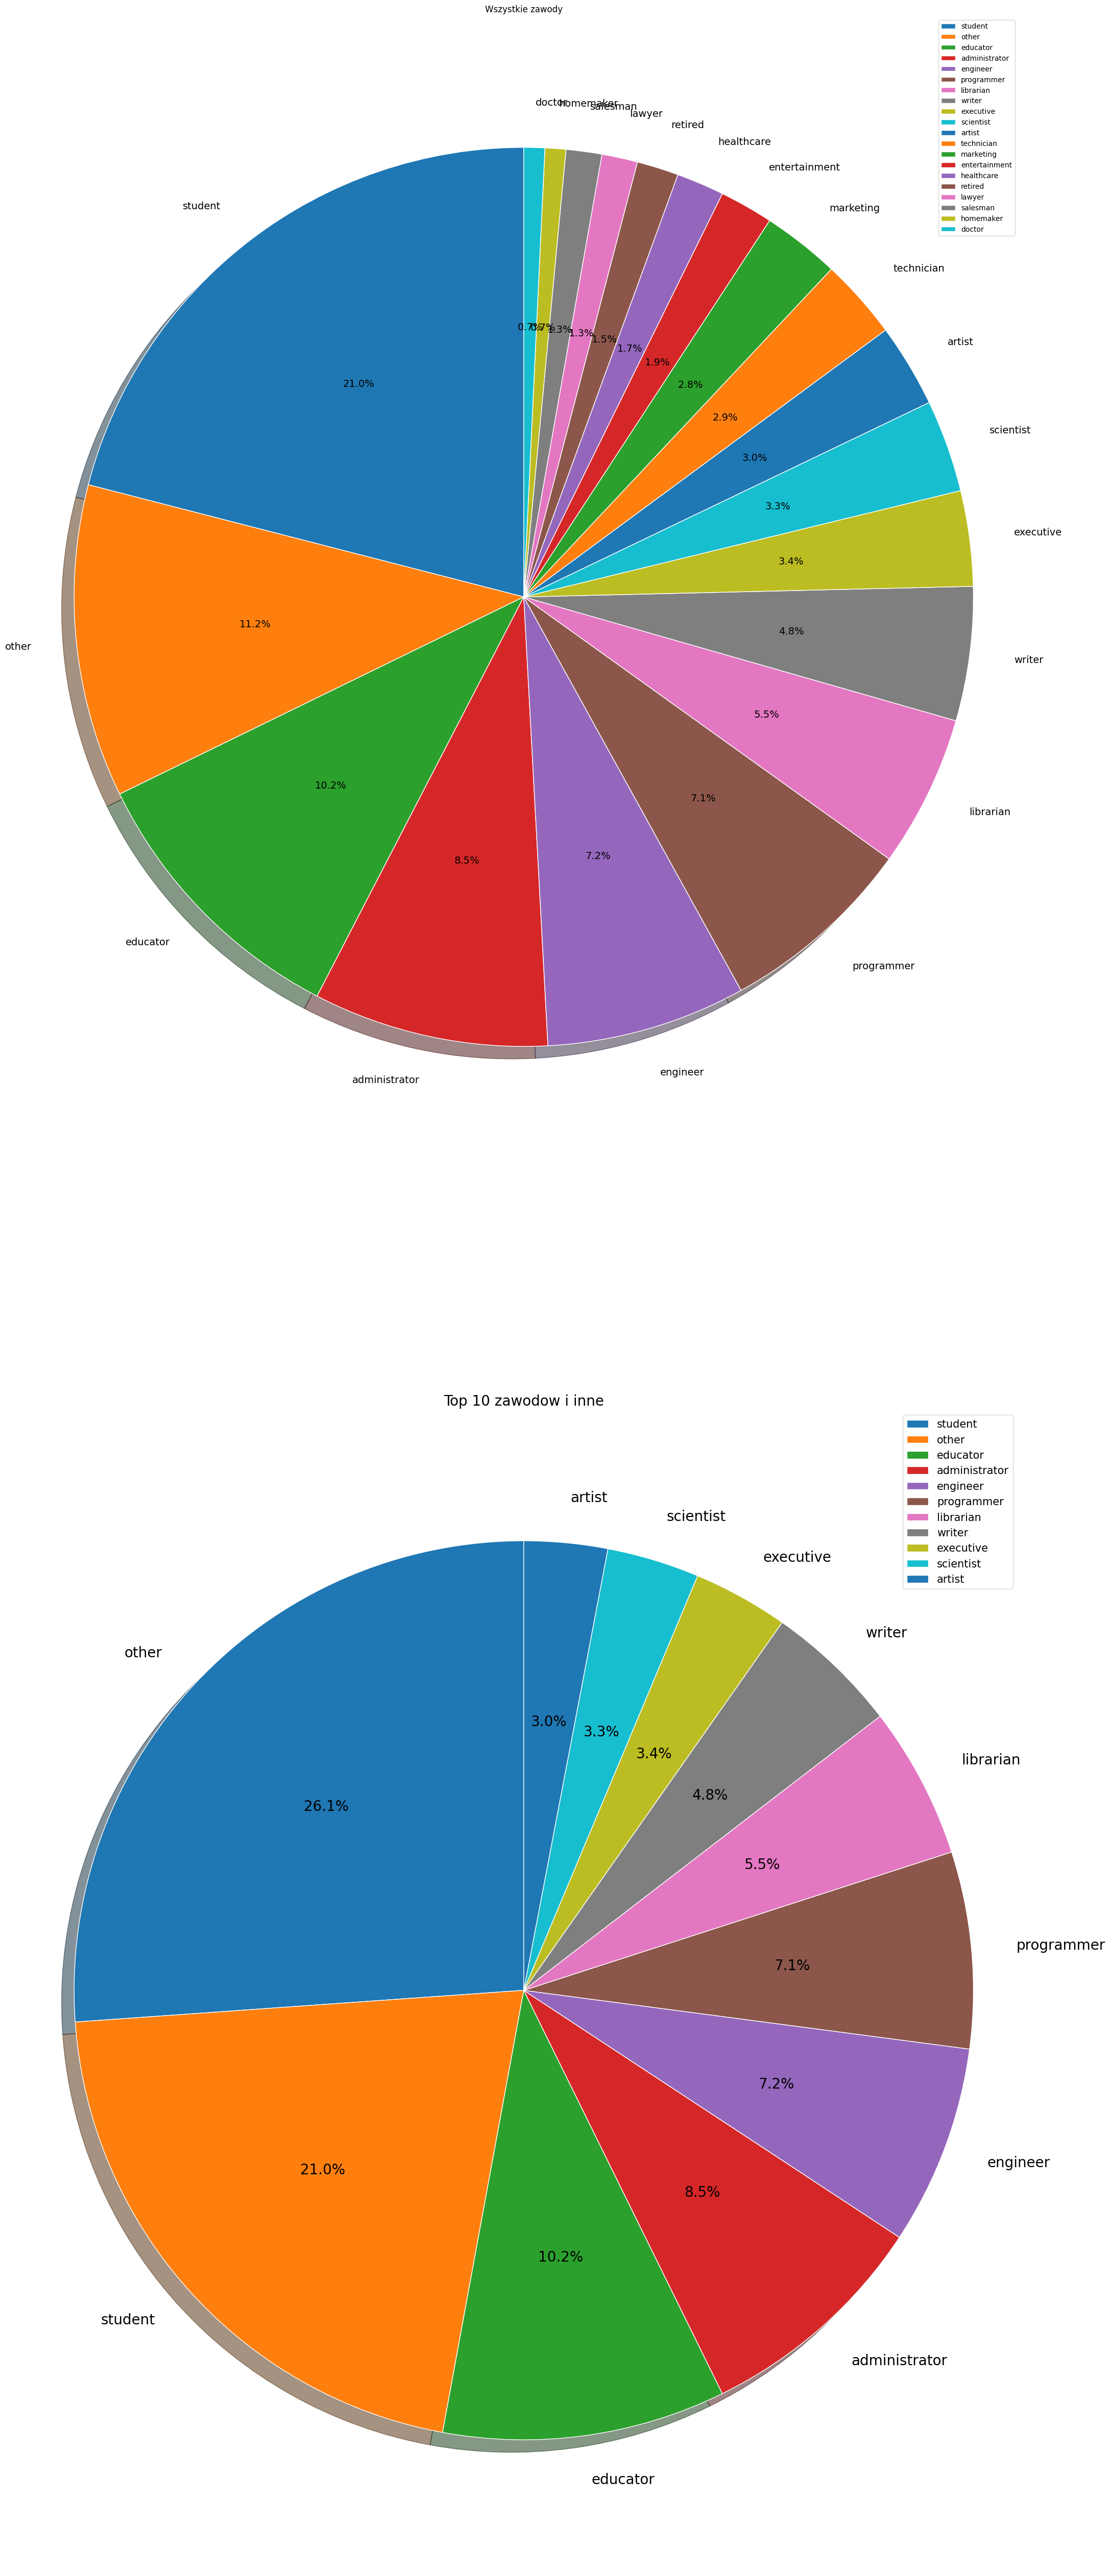

In [66]:
countOc = occupation[occupation['occupation'] != 'none']['occupation'].value_counts()
sizes = countOc.values / countOc.sum() * 100
fig, ax = plt.subplots(2, 1, figsize=(25,65))

ax[0].set_title("Wszystkie zawody")
ax[0].pie(sizes, labels=countOc.index.tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'fontsize': 14})
ax[0].legend(countOc.index.tolist(), loc="best")
ax[0].axis('equal')

top10 = countOc.drop('other').head(10)
other = pd.Series(countOc.drop(top10.index).sum(), index = ['other'])
count2 = pd.concat([other, top10])
sizes2 = count2.values / count2.sum() * 100

ax[1].set_title("Top 10 zawodow i inne", fontsize = 20)
ax[1].pie(sizes2, labels=count2.index.tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  textprops={'fontsize': 20})
ax[1].legend(countOc.index.tolist(), loc="best", fontsize = 15)
ax[1].axis('equal')

plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

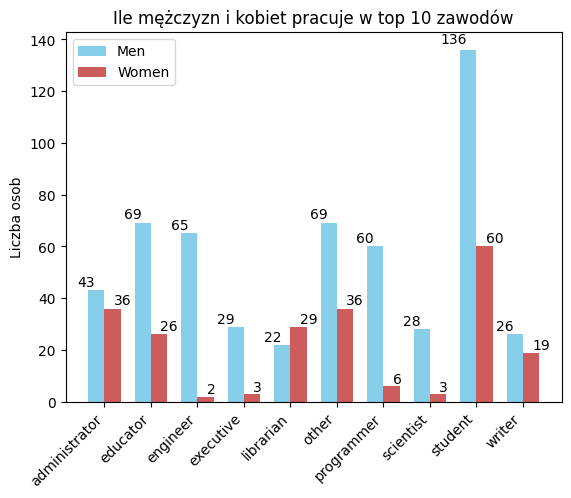

In [75]:
import numpy as np

top10 = occupation[occupation['occupation'] != 'none']['occupation'].value_counts().head(10).sort_index()
female = occupation[(occupation['gender'] == 'F') & (occupation['occupation'].isin(top10.index))]
male = occupation[(occupation['gender'] == 'M') & (occupation['occupation'].isin(top10.index))]

ind = np.arange(len(top10))  # the x locations for the groups
width = 0.35  # the width of the bars

m_count = male.groupby('occupation')['occupation'].count()
f_count = female.groupby('occupation')['occupation'].count()

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, m_count, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, f_count, width, color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Liczba osob')
ax.set_title('Ile mężczyzn i kobiet pracuje w top 10 zawodów')
ax.set_xticks(ind)
ax.set_xticklabels(top10.index, rotation=45, ha='right')
ax.legend()


def autolabel(ax, rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(ax, rects1, "left")
autolabel(ax, rects2, "right")

plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

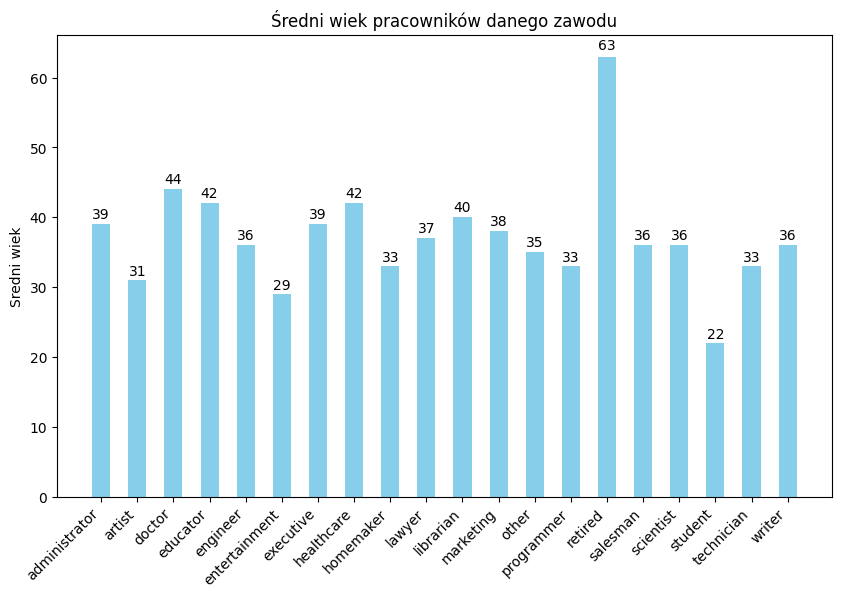

In [92]:
occ_mean = occupation[occupation['occupation'] != 'none'].groupby('occupation')['age'].mean().round(0).astype(int)
o = occ_mean.index.tolist()

ind = np.arange(len(o))
width = 0.5

fig, arx = plt.subplots(figsize=(10,6))
arx.set_title("Średni wiek pracowników danego zawodu")
arx.set_ylabel("Sredni wiek")
arx.set_xticks(ind)
arx.set_xticklabels(o, rotation=45, ha='right')
rect = arx.bar(ind, occ_mean.values, width, color='SkyBlue')
autolabel(arx, rect, xpos='center')
plt.show()


Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

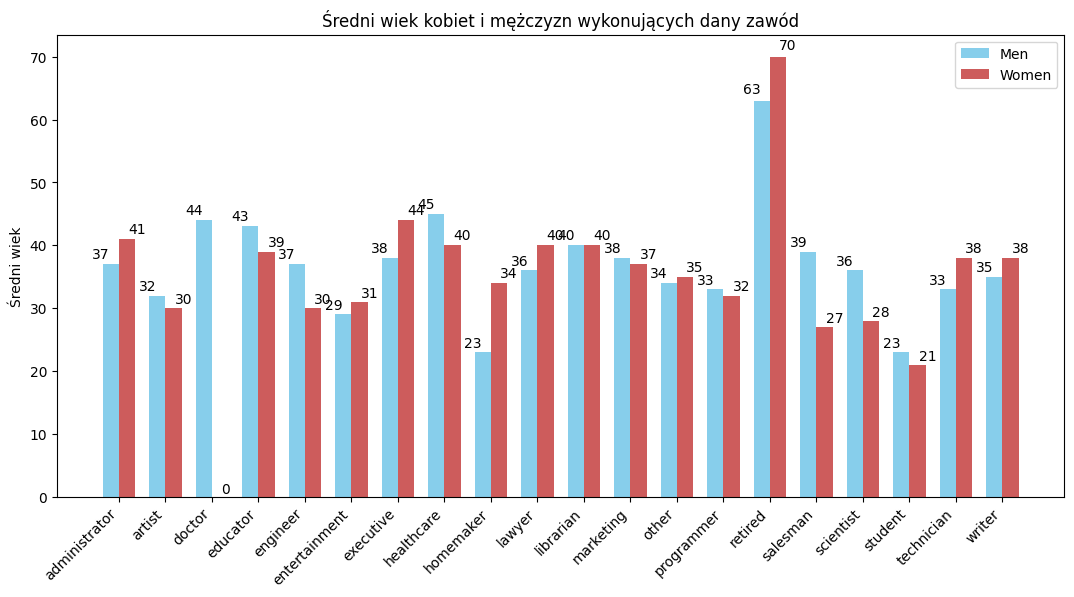

In [100]:
occ_mean_f = occupation[(occupation['occupation'] != 'none') & (occupation['gender'] == 'F')].groupby('occupation')['age'].mean().round(0).astype(int)
oc_f = occ_mean_f.index.tolist()
occ_mean_m = occupation[(occupation['occupation'] != 'none') & (occupation['gender'] == 'M')].groupby('occupation')['age'].mean().round(0).astype(int)
oc_m = occ_mean_m.index.tolist()
occ_mean_f = occ_mean_f.reindex(occ_mean_m.index, fill_value=0)

ind = np.arange(len(oc_m))
width = 0.35

fig, ax = plt.subplots(figsize = (13, 6))
rects1 = ax.bar(ind - width/2, occ_mean_m, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, occ_mean_f, width, color='IndianRed', label='Women')

ax.set_ylabel('Średni wiek')
ax.set_title('Średni wiek kobiet i mężczyzn wykonujących dany zawód')
ax.set_xticks(ind)
ax.set_xticklabels(oc_m, rotation=45, ha='right')
ax.legend()

autolabel(ax, rects1, "left")
autolabel(ax, rects2, "right")
